### YOLOv5를 활용한 재학습
- 관련 내용(가이드)
    - https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

#### 이미 학습된 모델에 추가 학습을 진행하므로 사용하려는 버전의 모델파일이 필요함
- yolov5 기 학습된 모델 파일 다운
    - https://github.com/ultralytics/yolov5

- **재 학습은 많은 자원을 필요로 하므로 colab등 자원이 높은 곳 에서 실행하는 것이 더 효과적이다**
    - colab 또는 aws에서 실행

### YOLO는 torch 계열 모델임
- pytorch와 gpu frame work cuda가 상응되는 버전이어야 함
- pytorch 버전과 현재 시스템의 gpu cuda 버전 확인

#### CPU
- 수백만 개의 트랜지스터로 구축된 CPU는 여러 개의 프로세싱 코어를 갖추고 있으며 보통 컴퓨터의 뇌로 간주된
- CPU는 컴퓨터 및 운영 체제에 필요한 명령과 처리를 실행하므로 모든 현대 컴퓨팅 시스템에 필수적인 요소이고 또한, CPU는 웹 서핑에서 스프레드시트 제작에 이르는 프로그램의 실행 속도를 결정하는 데도 중요하게 작용

#### GPU
- GPU는 더 작고 보다 전문화된 코어로 구성된 프로세서
- 여러 개의 코어가 함께 작동하므로, 여러 코어로 나누어 처리할 수 있는 작업의 경우 GPU가 엄청난 성능 이점을 제공
- 컴퓨터 시스템에서, 그래픽 연산을 빠르게 처리하여 결과값을 모니터에 출력하는 연산 장치임
    - 이미지는 데이터가 커서 관련연산에 많은 자원이 소요되므로 cpu만으로는 부족하게 됨
        - GPU 사용

In [1]:
import torch, torchvision
torch.__version__

'2.1.0+cpu'

In [2]:
print(torch.cuda.is_available())

False


### 현재 시스템에 GPU 사용이 가능한지 확인 및 가용가능 GPU 확인

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Nov 16 09:16:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.78       Driver Version: 528.78       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0    15W /  65W |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
device

device(type='cuda')

### pytorch & cuda 버전 매칭 방법
1. aws에 가상환경 생성
2. 해당 가상환경에서 pytorch & cuda 설치
3. 생성된 가상환경 주피터 노트북에 추가

1. aws에 가상환경 생성
- conda create --name yoloTest python=3.8
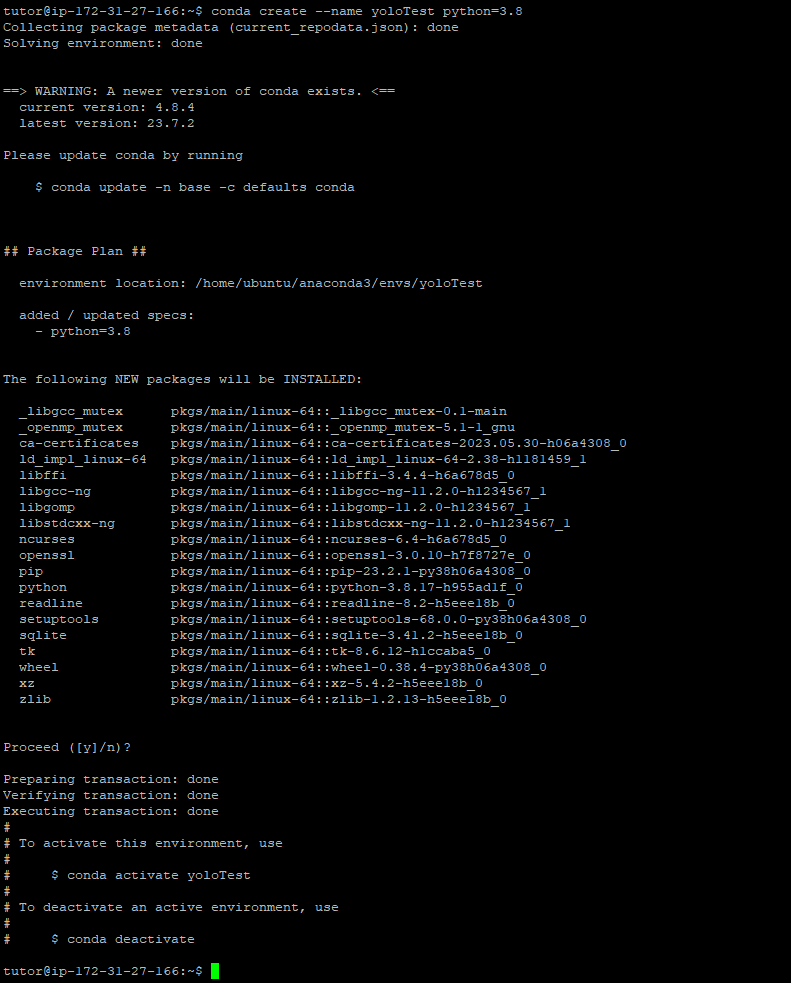
2. 해당 가상환경에서 pytorch & cuda 설치
- https://pytorch.org/get-started/locally/ 사이트에서 현재 시스템에 맞는 pytorch와 cuda 버전 확인 가능
- conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
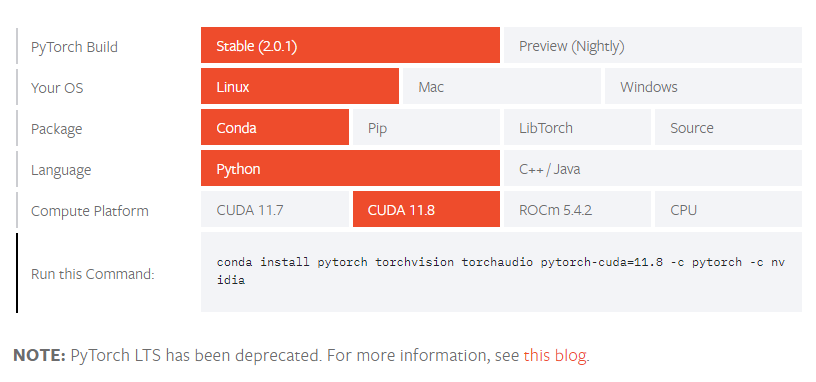
- aws 터미널에서 명령 실행
    - ####@ip-172-31-27-166:~\$ conda activate yoloTest
    - (yoloTest) ####@ip-172-31-27-166:~$ conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
    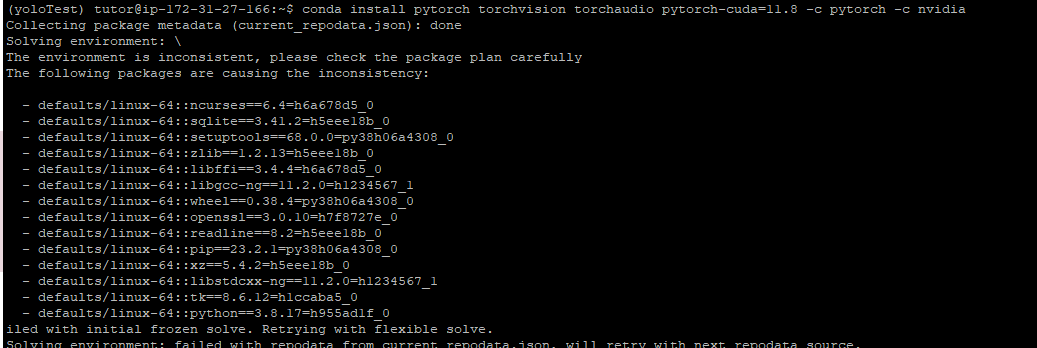
    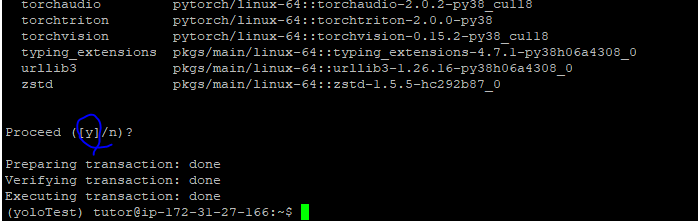
    
3. 생성된 가상환경 주피터노트북에 추가
    - python -m ipykernel install --user --name 가상환경명 --display-name "커널출력명"
    - python -m ipykernel install --user --name yoloTest --display-name "yolo_test"
    - ipykernel 없으면 설치 : pip install ipykernel
    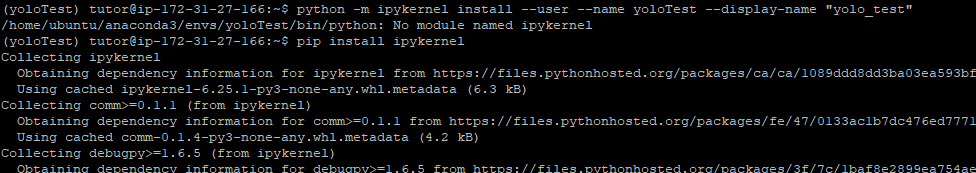
        - 주피터노트북에 가상환경 추가 : python -m ipykernel install --user --name yoloTest --display-name "yolo_test"
        - Installed kernelspec yoloTest in /home/tutor/.local/share/jupyter/kernels/yolotest 문구 출력되면 주피터 노트북 재 접속
4. 주피터노트북에서 확인
    - 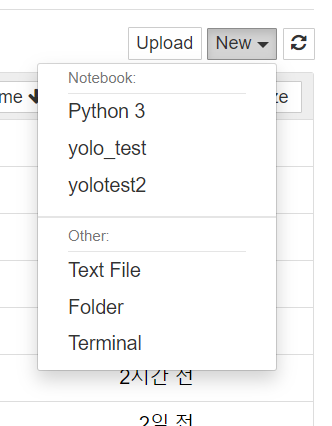

### YOLOV5를 활용 이미지 객체 검출 재학습
1. 기 학습된 yolov5 다운로드
2. 필수 패키지 install
3. 재학습 이미지 준비
    1. 이미지 관련 데이터 생성
4. yolo 설정파일(yaml) 재학습 이미지에 맞게 수정
5. 재학습
6. 확인

### 가상환경에서 
- conda install git 
    - git 설치 후 주피터 노트북 다시 실행

In [7]:
### yolov5 파일 다운
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [1]:
# %pwd
# %ls

In [4]:
# yolov5 필수 패키지 인스톨
%cd yolov5/
!pip install -r requirements.txt

C:\Users\82105\DataScience\딥러닝\yolov5


C:\Anaconda3\envs\tf\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### 학습 데이터 셋 roboflow에서 다운 받기

In [5]:
# 주피터 노트북에서 다운받기
!pip install roboflow

## roboflow dataset 사용방법
- https://app.roboflow.com/login 접속 후 구글 로그인
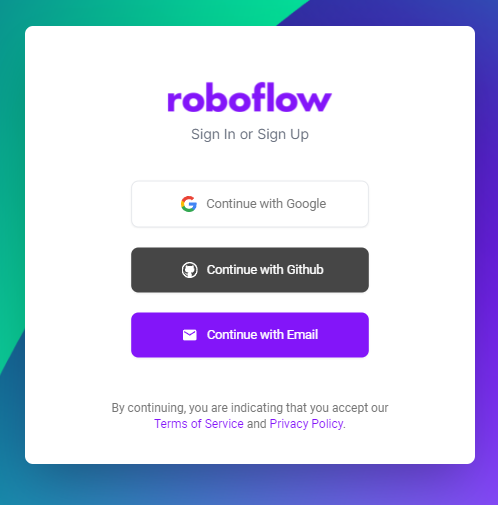
- resource 의 public data 접속
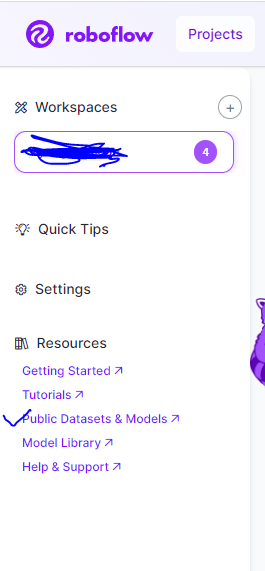
- 검색창에 검색 단어 입력
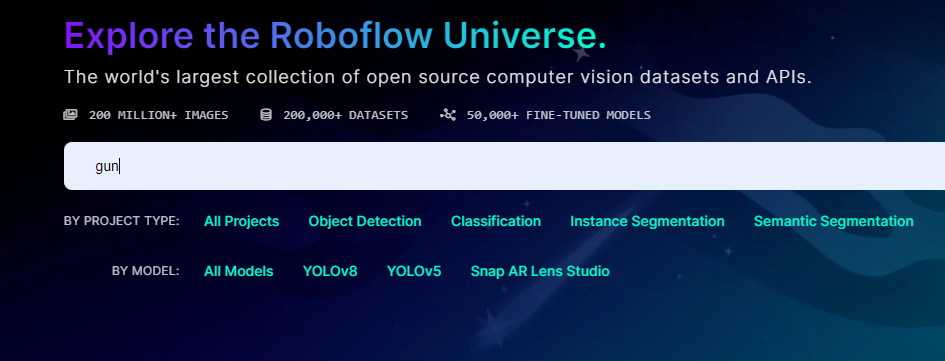
- 출력되는 결과 중 필요 project로 접근
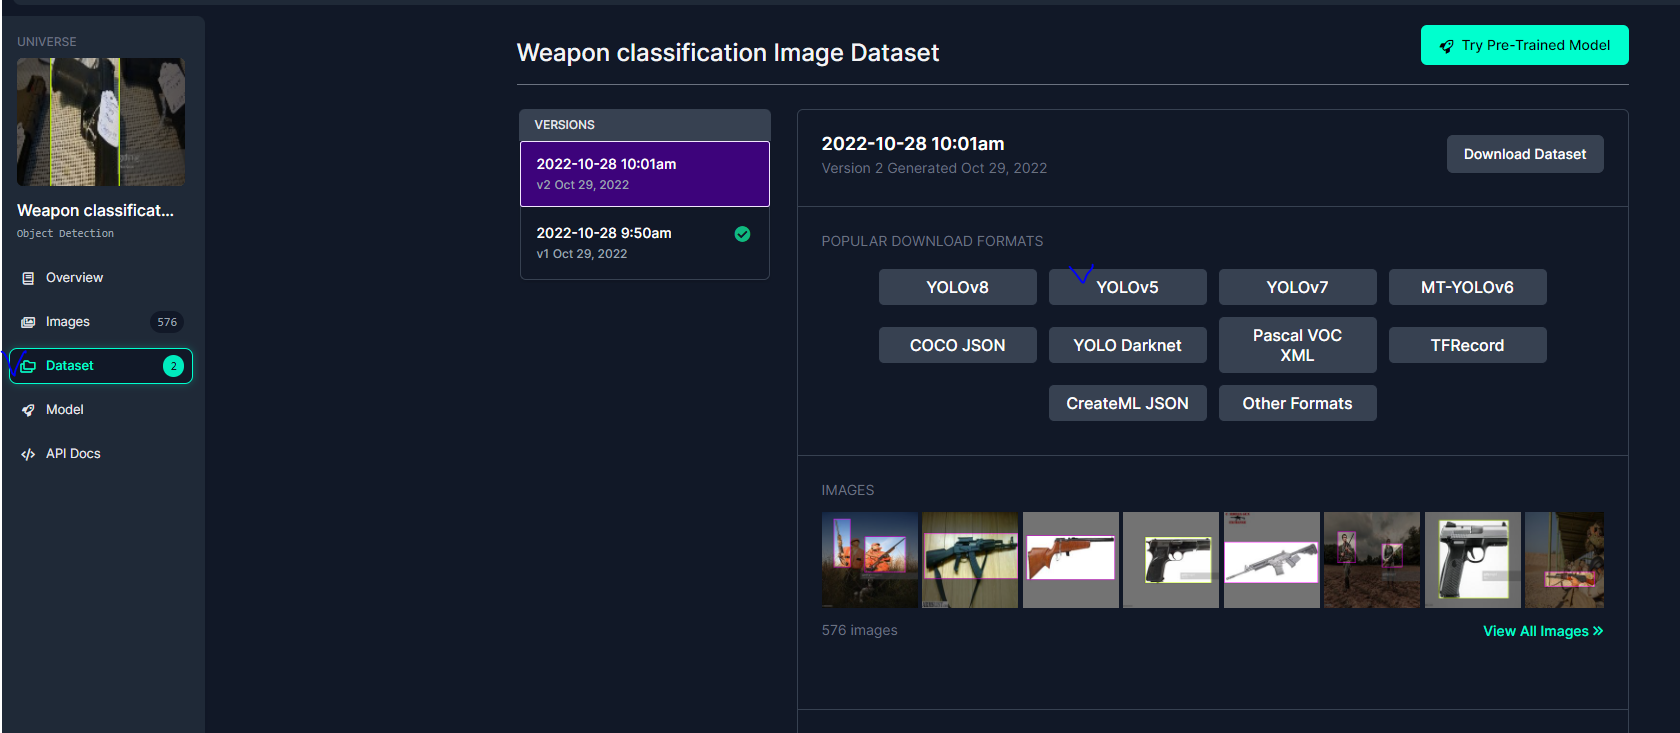
- 필요버전 클릭
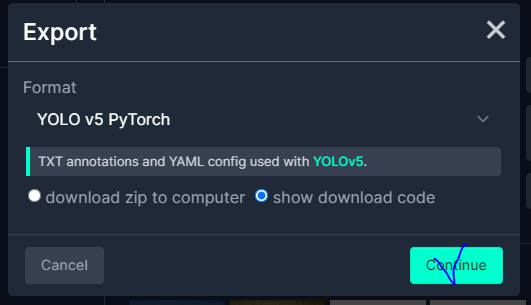
- 다운로드 코드 복사 후 노트북에서 실행
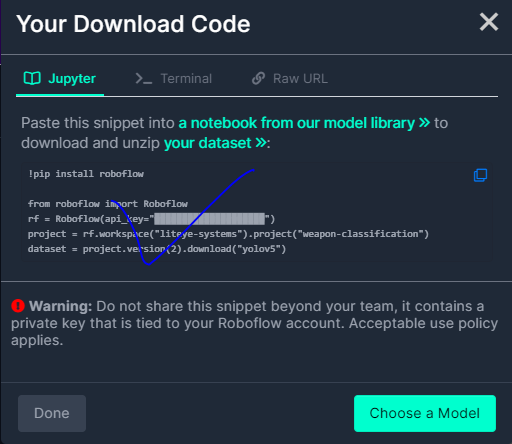

## 아래 프로젝트의 dataset을 사용하여 진행

In [1]:
# 현재 디렉터리 확인
# 

[Errno 2] No such file or directory: './detect'
/home/tutor/detect


'/home/tutor/detect'

In [11]:
from roboflow import Roboflow

In [12]:
rf = Roboflow(api_key="wvzmTeHnkxHjddwQa2hW")
project = rf.workspace("joseph-nelson").project("pistols")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pistols-1 in yolov5pytorch:: 100%|█████████████| 5945/5945 [00:00<00:00, 8901.52it/s]


### 터미널(리눅스)에서 다운받기
- curl -L "https://public.roboflow.com/ds/mQ1iDMNfK2?key=WedKbdS9ry" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

### 다운 url
- https://public.roboflow.com/ds/mQ1iDMNfK2?key=WedKbdS9ry

### 학습 이미지 경로 재 설정
- data.yaml 파일 직접 수정
- 파일은 다운받은 roboflow 폴더 내에 있음
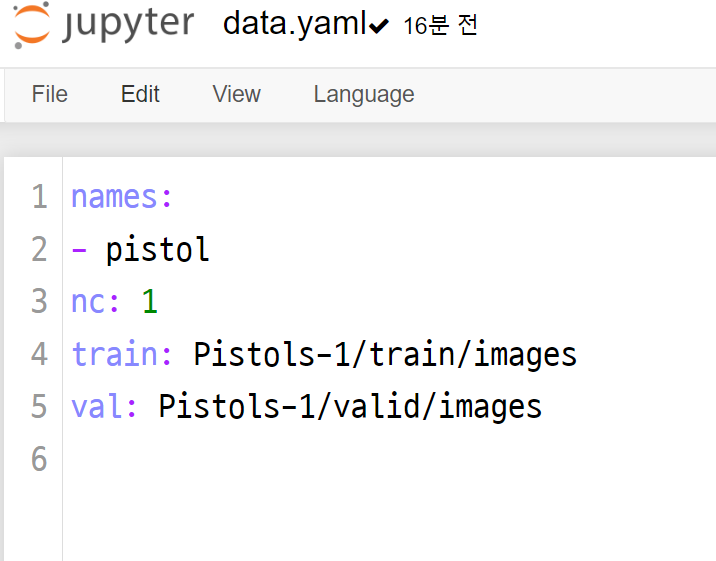
- yaml 파일의 필수 요소
    - 학습데이터 경로
        - train: train/images
        - val: valid/images
        - test: test/images
    - 클래스 수
        - nc: 2
    - 클래스 이름
        - names: ['name1','name2',...]
- roboflow에서 다운 받은 파일은 프로젝트명-번호/ 아래 생성되므로 파일 열어 확인 후 조정이 필요하면 조정한다        

### 재학습 방법
1. 학습시킬 dataset 준비
    - label data도 있어야 함
    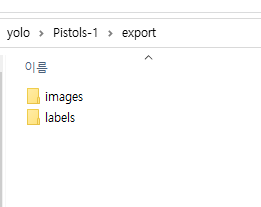
    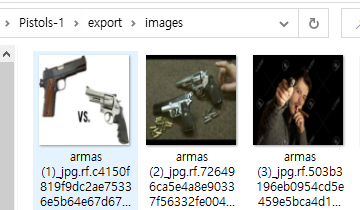
    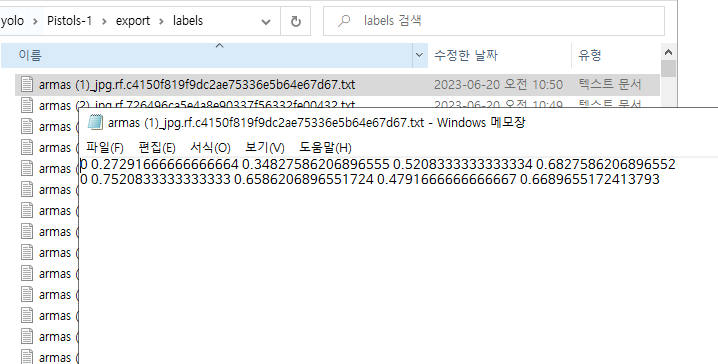
    2. 학습시킬 이미지의 파일명과 라벨 정보를 모델에게 전달해야 하므로
        1. 사용할 이미지의 저장경로및 파일명을 리스트로 생성
        2. 1번에서 생성한 리스트로 학습/검증 데이터 분리
        3. 2번에서 분리된 내용을 이용해서 각 이미지파일명을 txt 파일로 생성
            - 파일 저장 경로는 어디도 상관없지만 이미지 dataset이 있는 곳에 같이 저장하는것이 효율적
        4. data.yaml 파일을 로드해서 학습데이터와 테스트데이터의 정보(3번에서 생성한 txt파일의 저장경로)를 설정후 다시 data.yaml에 저장
        5. yolo의 train.py 파일을 이용해서 재 학습
        6. 텐서보드 이용한 학습결과 시각화
        7. yolo의 detect.py 파일을 이용해서 객체 검출

In [13]:
# 1. 사용할 이미지의 리스트 생성
from glob import glob
img_list = glob('Pistols-1/export/images/*.jpg')
print(len(img_list))

2971


In [6]:
img_list

['Pistols-1/export/images/armas (663)_jpg.rf.d9d86fa3e2119f3d9841684e0b643055.jpg',
 'Pistols-1/export/images/armas (765)_jpg.rf.6c43a016230f55d3a32522d5793361b1.jpg',
 'Pistols-1/export/images/armas (593)_jpg.rf.5198aab96c4568d456e1a379d15af5c3.jpg',
 'Pistols-1/export/images/armas (1789)_jpg.rf.454c60e6ab985415e3a7bcd3920abdb8.jpg',
 'Pistols-1/export/images/armas (485)_jpg.rf.be680bde647cfcb709176c3c44089d90.jpg',
 'Pistols-1/export/images/armas (763)_jpg.rf.6e6d88bc42c8f3df12bfdbce16d29cbb.jpg',
 'Pistols-1/export/images/armas (385)_jpg.rf.f4e0af65afda1b78b09085ca945eb01b.jpg',
 'Pistols-1/export/images/armas (1160)_jpg.rf.aa99e3a71daa49c1647fda10bfa0a8db.jpg',
 'Pistols-1/export/images/armas (2896)_jpg.rf.8507d2339933f643c7f8f1de16236b61.jpg',
 'Pistols-1/export/images/armas (329)_jpg.rf.8fa6b2984df560b356151cd5e8dd424c.jpg',
 'Pistols-1/export/images/armas (2227)_jpg.rf.d62a9155e09dba2ce3c870cc84048ada.jpg',
 'Pistols-1/export/images/armas (2196)_jpg.rf.83b607990bda5b99df67aaca14

In [10]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/bf/15/d1b649fc7685d11b806b4546a5438191fb2ad761de70da95ff676189dcec/scikit_learn-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.1 MB)


In [14]:
# 2. 1번에서 생성한 리스트로 학습/검증 데이터 분리
# 학습-테스트 이미지 나누기
from sklearn.model_selection import train_test_split
train_img_list, val_img_list = train_test_split(img_list, test_size = 0.2, random_state = 2000)
print(len(train_img_list), len(val_img_list))

2376 595


In [15]:
%pwd # 현재 위치 확인하고

'D:\\DataScience\\수업자료\\detect'

In [12]:
# /home/tutor/detect 로 이동
%cd ..
%pwd

/home/tutor/detect


'/home/tutor/detect'

In [16]:
# 3. 2번에서 분리된 내용을 이용해서 각 이미지파일명을 목록으로 갖고있는 txt 파일 생성
# train, val 이미지 목록파일 생성
with open('Pistols-1/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('Pistols-1/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

- 파일 생성 확인
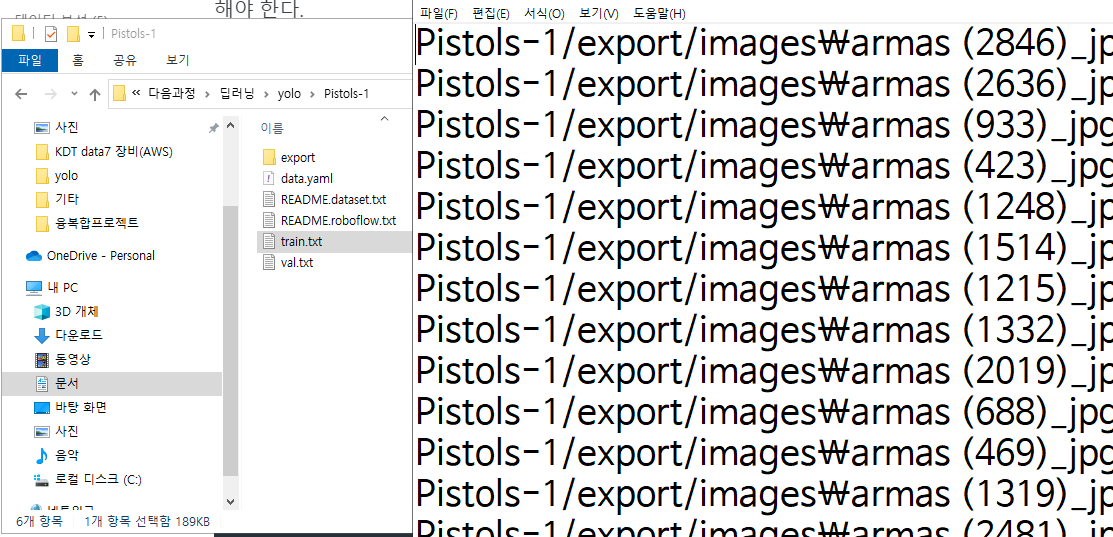

In [22]:
#  4. data.yaml 파일을 로드해서 학습데이터와 
#  테스트데이터의 정보(3번에서 생성한 txt파일의 저장경로)를 설정
## image와 파일 목록 매칭
# roboflow에서 설정해서 다운됨. roboflow 파일이 아닌경우 진행함
import yaml

with open('./Pistols-1/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

print(data)

{'names': ['pistol'], 'nc': 1, 'train': './Pistols-1/train.txt', 'val': './Pistols-1/val.txt'}


In [23]:
data['train'] = 'd:/DataScience/수업자료/detect/Pistols-1/train.txt'
data['val'] = 'd:/DataScience/수업자료/detect/Pistols-1/val.txt'

with open('./Pistols-1/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'names': ['pistol'], 'nc': 1, 'train': 'd:/DataScience/수업자료/detect/Pistols-1/train.txt', 'val': 'd:/DataScience/수업자료/detect/Pistols-1/val.txt'}


In [19]:
import torch
torch.__version__

'2.1.0+cu121'

### 재학습
- 현재 디렉터리 확인 후 train.py 파일 사용해서 재학습진행
- 관련 파라미터
    - img : 입력 이미지 크기 정의
    - batch : 배치 사이즈 결정
    - epochs : 훈련 에포크의 수 정의(Note : 주로 3000이상)
    - data : yaml 파일의 경로 설정
    - cfg : 모델 설정 지정
    - weights : 가중치 custom 경로 지정(Note : Ultralytics Google Drive folder에서 다운로드 가능)
    - name : 결과명
    - nosave : 최종 checkpoint만 저장
    - cache : 더 빠른 훈련을 위한 캐싱 이미지

In [21]:
# 5. yolo의 train.py 파일을 이용해서 재 학습
# %cd /content/yolov5/ # 코랩에서 진행 시 사용
# gpu 사용해야 학습속도가 좀 나올 수 있음

!python ./yolov5/train.py --img 416 --batch 4 --epochs 50 --data ./Pistols-1/data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name results

Traceback (most recent call last):
  File "D:\DataScience\수업자료\detect\yolov5\train.py", line 35, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


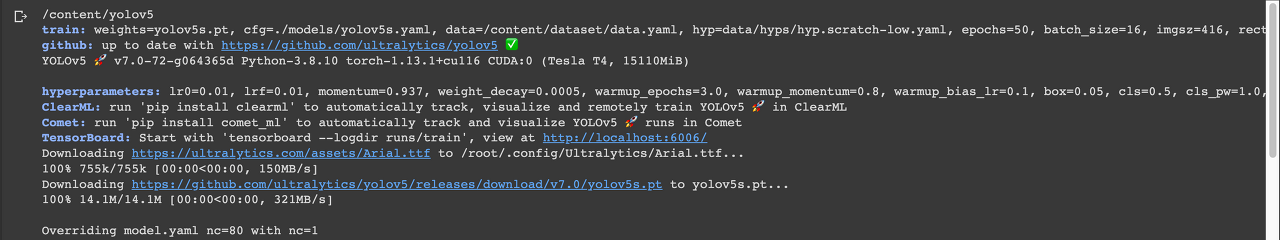

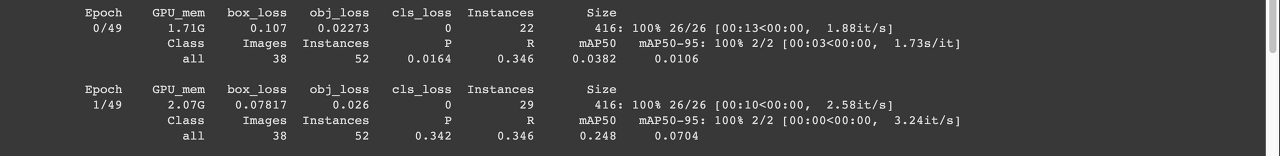

#### 학습 완료후 학습된 모델의 저장 경로가 마지막에 가이드 됨
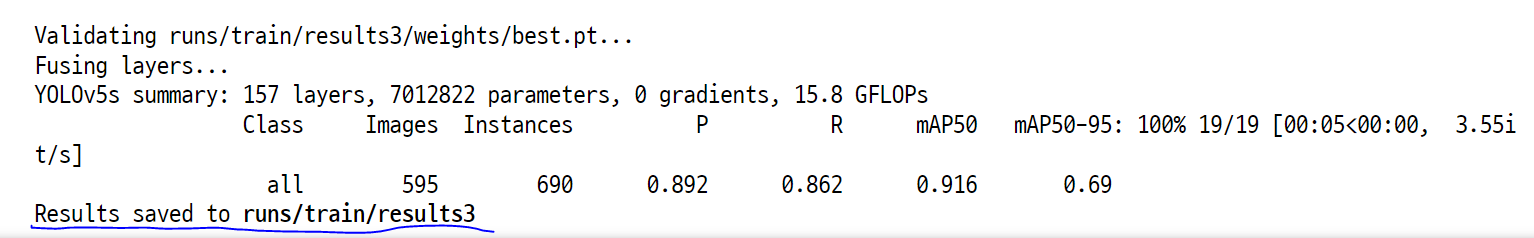

### 재학습 완료된 모듈 활용하여 객체 검출
- detect.py 파일 사용
    - --weights : 재학습된 모델 가중치 경로
    - --img : 객체 검출을 할 이미지 size(학습 이미지와 동일사이즈여야 함)
    - --conf : 검출 최저 확률
    - --source : 객체 검출 할 이미지 파일 경로 및 파일명

In [20]:
%cd ./yolov5

/home/tutor/detect/yolov5


In [21]:
%pwd

'/home/tutor/detect/yolov5'

### 이미지 객체 검출 결과 : Results saved to runs/detect/exp7
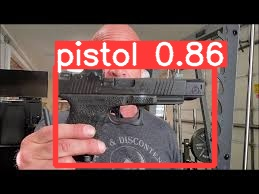

In [6]:
!dir

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 9E31-9353

 C:\Users\82105\DataScience\딥러닝\yolov5 디렉터리

2023-11-16  오전 09:15    <DIR>          .
2023-11-16  오전 09:19    <DIR>          ..
2023-11-16  오전 09:14             3,923 .dockerignore
2023-11-16  오전 09:14                77 .gitattributes
2023-11-16  오전 09:15    <DIR>          .github
2023-11-16  오전 09:14             4,255 .gitignore
2023-11-16  오전 09:14             1,888 .pre-commit-config.yaml
2023-11-16  오전 09:14             8,183 benchmarks.py
2023-11-16  오전 09:14               407 CITATION.cff
2023-11-16  오전 09:15    <DIR>          classify
2023-11-16  오전 09:14             5,102 CONTRIBUTING.md
2023-11-16  오전 09:15    <DIR>          data
2023-11-16  오전 09:14            15,649 detect.py
2023-11-16  오전 09:14            42,138 export.py
2023-11-16  오전 09:14             7,938 hubconf.py
2023-11-16  오전 09:14            35,184 LICENSE
2023-11-16  오전 09:15    <DIR>          models
2023-11-15  오전 10:21    <DIR>          Pistols-1
2023-11-16  오전 09:14

In [25]:
%cd ./runs/train

/home/tutor/detect/yolov5/runs/train


In [26]:
!ls

results    results11  results3	results5  results7  results9
results10  results2   results4	results6  results8


In [33]:
%cd ..


/home/tutor/detect/yolov5


In [34]:
%ls
%pwd

CITATION.cff     README.zh-CN.md  detect.py         runs/           utils/
CONTRIBUTING.md  __pycache__/     export.py         segment/        val.py
LICENSE          benchmarks.py    hubconf.py        setup.cfg
Pistols-1/       classify/        models/           train.py
README.md        data/            requirements.txt  tutorial.ipynb


'/home/tutor/detect/yolov5'

In [7]:
import torch

In [10]:
#7. yolo의 detect.py 파일을 이용해서 객체 검출(이미지)
!python detect.py --weights ./runs/train/results2/weights/best.pt --img 416 --conf 0.5 --source ../gum.jpg

detect: weights=['./runs/train/results2/weights/best.pt'], source=../gum.jpg, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-240-g84ec8b58 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\82105\DataScience\\gum.jpg: 320x416 1 pistol, 62.6ms
Speed: 0.0ms pre-process, 62.6ms inference, 0.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs\detect\exp5


### 동영상 객체 검출 결과 : Results saved to runs/detect/exp6
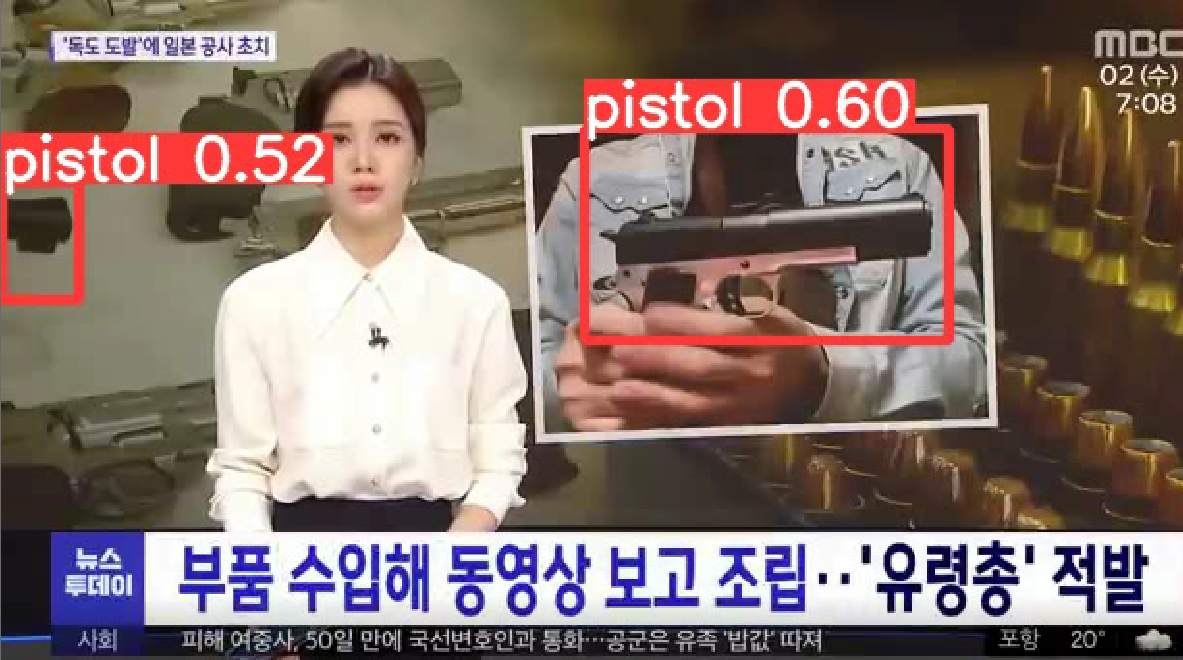

In [11]:
#7. yolo의 detect.py 파일을 이용해서 객체 검출(동영상)
!python detect.py --weights ./runs/train/results2/weights/best.pt --img 416 --conf 0.5 --source ../gun.mp4

detect: weights=['./runs/train/results2/weights/best.pt'], source=../gun.mp4, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-240-g84ec8b58 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/4214) C:\Users\82105\DataScience\\gun.mp4: 256x416 2 pistols, 52.7ms
video 1/1 (2/4214) C:\Users\82105\DataScience\\gun.mp4: 256x416 2 pistols, 40.2ms
video 1/1 (3/4214) C:\Users\82105\DataScience\\gun.mp4: 256x416 2 pistols, 40.7ms
video 1/1 (4/4214) C:\Users\82105\DataScience\\gun.mp4: 256x416 2 pistols, 38.4ms
video 1/1 (5/4214) C:\Users\82

### 이미지 객체 검출 결과후 검출 좌표 저장 : Results saved to runs/detect/exp7
- 1 labels saved to runs/detect/exp7/labels (검출 좌표)
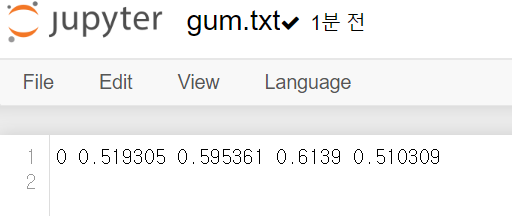

In [12]:
# 7. yolo의 detect.py 파일을 이용해서 객체 검출
## 한글경로 에러남
## --save-txt option은 검출된 객체의 좌표 저장
!python detect.py --weights ./runs/train/results2/weights/best.pt --img 416 --conf 0.5 --source ../gum.jpg --save-txt

detect: weights=['./runs/train/results2/weights/best.pt'], source=../gum.jpg, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-240-g84ec8b58 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\82105\DataScience\\gum.jpg: 320x416 1 pistol, 56.5ms
Speed: 0.0ms pre-process, 56.5ms inference, 0.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs\detect\exp7
1 labels saved to runs\detect\exp7\labels


### 이미지 객체 검출 후 검출된 객체 크롭해서 저장 : Results saved to runs/detect/exp8
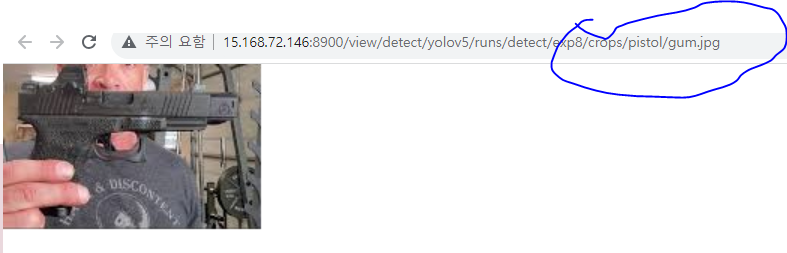

In [13]:
# 7. yolo의 detect.py 파일을 이용해서 객체 검출
# 검출된 객체만 크롭해서 저장
# --save-crop
!python detect.py --weights ./runs/train/results2/weights/best.pt --img 416 --conf 0.5 --source ../gum.jpg --save-crop

detect: weights=['./runs/train/results2/weights/best.pt'], source=../gum.jpg, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-240-g84ec8b58 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\82105\DataScience\\gum.jpg: 320x416 1 pistol, 53.9ms
Speed: 1.5ms pre-process, 53.9ms inference, 1.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs\detect\exp8


## 검출된 객체 좌표 실제 이미지 좌표로 변환
- 객체 class, 객체 검출 좌표(1,2 이미지 중점(x,y),3(width),4(height))

In [14]:
# 검출된 객체의 좌표 저장 파일 확인
import pandas as pd
df = pd.read_csv('./runs/detect/exp7/labels/gum.txt',sep=' ',header=None)
df
## 객체 class, 객체 검출 좌표(1,2 이미지 중점(x,y),3(width),4(height))

,0,1,2,3,4
0,0,0.488417,0.600515,0.552124,0.5


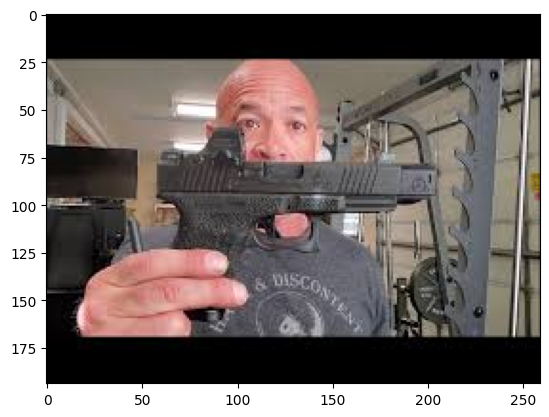

In [19]:
# 테스트 이미지
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

sample = cv2.imread('../gum.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [15]:
# 이미지 넓이 높이 확인
import cv2
img = cv2.imread('../gum.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape

In [16]:
img.shape

(194, 259, 3)

In [17]:
height, width

(194, 259)

In [18]:
194*.5

97.0

### 이미지에서 검출된 객체의 좌표를 이미지 기준 좌표로 변환

In [21]:
# 검출된 객체의 좌표를 이미지 좌표로 변환
# Object detected
center_x = int(df[1] * width)
center_y = int(df[2] * height)
print(center_x, center_y)

126 116


C:\Users\82105\AppData\Local\Temp\ipykernel_45104\464626100.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  center_x = int(df[1] * width)
C:\Users\82105\AppData\Local\Temp\ipykernel_45104\464626100.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  center_y = int(df[2] * height)


In [22]:
w = int(df[3] * width)
h = int(df[4] * height)

# 사각형 시작 좌표
x = int(center_x - (w / 2))
y = int(center_y - (h / 2))
print(w,h)

143 97


C:\Users\82105\AppData\Local\Temp\ipykernel_45104\1970366480.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  w = int(df[3] * width)
C:\Users\82105\AppData\Local\Temp\ipykernel_45104\1970366480.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  h = int(df[4] * height)


In [23]:
w,h,x,y

(143, 97, 54, 67)

## 이미지에 바운딩 box 그리기

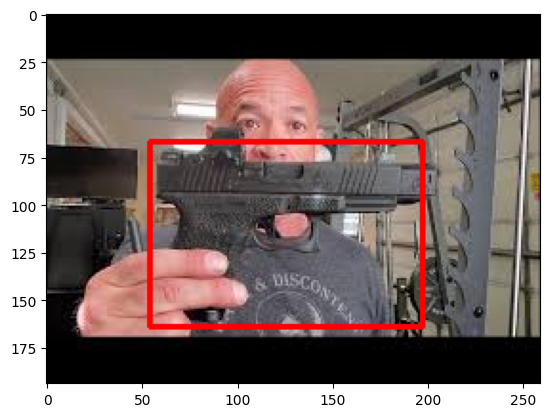

In [24]:
sample = cv2.imread('../gum.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
pt1 = (int(x), int(y))
pt2 = (int(x+w), int(y+h))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)